## Data Exploration and Preprocessing

In [4]:
#!pip install ppscore

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('adult_with_headers.csv')

In [39]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
df.shape

(32561, 15)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [44]:
df = df.replace('?', np.nan)
print("Missing values after replacing '?':\n", df.isnull().sum())

Missing values after replacing '?':
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [45]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values after imputation:\n", df.isnull().sum().sum())


Missing values after imputation:
 0


In [46]:
num_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

In [47]:
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_features] = scaler_standard.fit_transform(df[num_features])

In [48]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])

print("\n--- Scaling Discussion ---")
print("Standard Scaling is preferred when data follows a Gaussian distribution and outliers exist, as it centers data around mean 0 with unit variance.")
print("Min-Max Scaling is useful when features need to be bounded in a specific range [0,1], such as for neural networks or distance-based models.")


--- Scaling Discussion ---
Standard Scaling is preferred when data follows a Gaussian distribution and outliers exist, as it centers data around mean 0 with unit variance.
Min-Max Scaling is useful when features need to be bounded in a specific range [0,1], such as for neural networks or distance-based models.


##  Encoding Techniques

In [49]:
categorical_cols = df.select_dtypes(include=['object']).columns
ohe_cols = [col for col in categorical_cols if df[col].nunique() < 5]
le_cols = [col for col in categorical_cols if df[col].nunique() >= 5]

In [50]:
df_encoded = pd.get_dummies(df, columns=ohe_cols)

In [51]:
le = LabelEncoder()
for col in le_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\n--- Encoding Discussion ---")
print("One-Hot Encoding pros: keeps categorical meaning without order assumption, good for low-cardinality. Cons: expands feature space, may cause sparsity.")
print("Label Encoding pros: efficient, no feature explosion. Cons: imposes artificial ordinal relationship that may mislead models.")


--- Encoding Discussion ---
One-Hot Encoding pros: keeps categorical meaning without order assumption, good for low-cardinality. Cons: expands feature space, may cause sparsity.
Label Encoding pros: efficient, no feature explosion. Cons: imposes artificial ordinal relationship that may mislead models.


## Feature Engineering

In [52]:
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0,25,45,65,100], labels=['Young','Adult','Middle-Aged','Senior'])
df_encoded['work_hours_per_age'] = df_encoded['hours_per_week'] / (df_encoded['age']+1)

print("\n--- Feature Engineering Discussion ---")
print("Created 'age_group' to capture non-linear relation between age and income.")
print("Created 'work_hours_per_age' to see productivity relative to age.")


--- Feature Engineering Discussion ---
Created 'age_group' to capture non-linear relation between age and income.
Created 'work_hours_per_age' to see productivity relative to age.


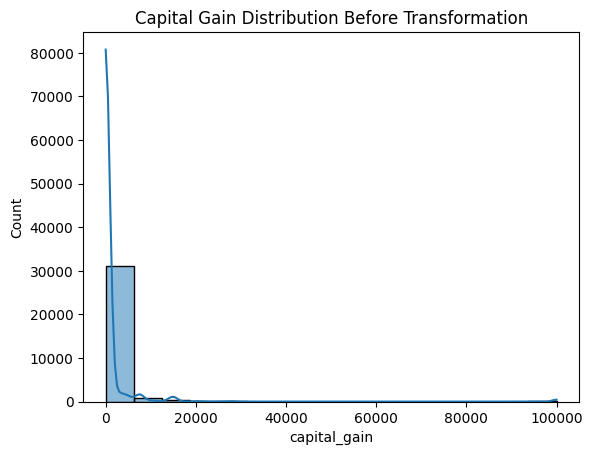

In [53]:
sns.histplot(df_encoded['capital_gain'], kde=True)
plt.title("Capital Gain Distribution Before Transformation")
plt.show()

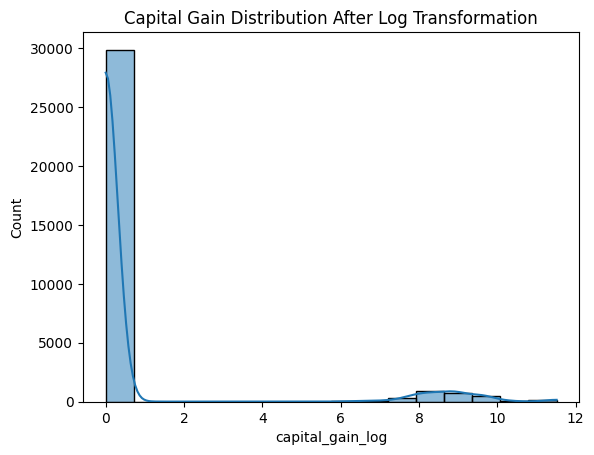

Log transformation reduces skewness of 'capital_gain', making it more suitable for models.


In [54]:
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

sns.histplot(df_encoded['capital_gain_log'], kde=True)
plt.title("Capital Gain Distribution After Log Transformation")
plt.show()

print("Log transformation reduces skewness of 'capital_gain', making it more suitable for models.")

## Feature Selection

In [55]:
iso = IsolationForest(contamination=0.01, random_state=42)
yhat = iso.fit_predict(df_encoded[num_features])
mask = yhat != -1

df_no_outliers = df_encoded[mask]
print("\nRemoved outliers:", df_encoded.shape[0] - df_no_outliers.shape[0])


Removed outliers: 326


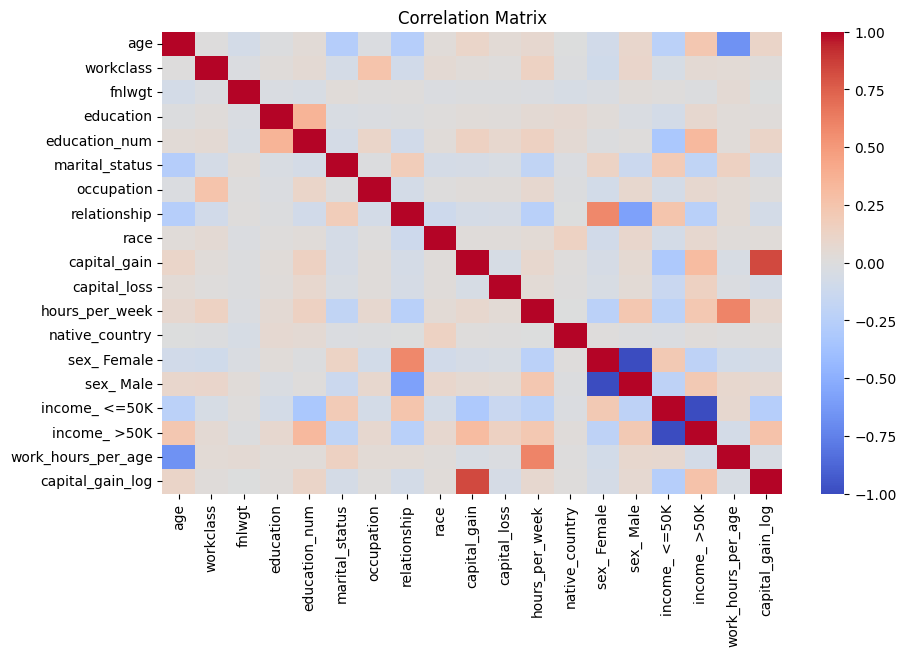

In [66]:
corr_matrix = df_no_outliers.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [67]:
print("--- PPS vs Correlation ---")
print("Correlation captures only linear relationships, while PPS captures non-linear predictive power as well. PPS is more useful for categorical and mixed-type features.")

--- PPS vs Correlation ---
Correlation captures only linear relationships, while PPS captures non-linear predictive power as well. PPS is more useful for categorical and mixed-type features.
